<a href="https://colab.research.google.com/github/2018007956/2018007956/blob/main/Exercise/(4%E1%84%80%E1%85%A1%E1%86%BC_%E1%84%89%E1%85%B5%E1%86%AF%E1%84%89%E1%85%B3%E1%86%B8)_Autograd_and_Optimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (4강-실습) AutoGrad and Optimizer
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/BoostcampAITech/lecture-note-python-basics-for-ai/blob/main/codes/pytorch/07_torch-study/autograd_and_optimizer.ipynb)

### 1) 실습 개요
이번 실습에서는 PyTorch의 기본 구성 요소인 torch.Tensor와 nn.Parameter에 대한 깊은 이해를 바탕으로, 선형 회귀와 로지스틱 회귀 모델을 직접 구현합니다. 특히 로지스틱 회귀에서는 PyTorch의 AutoGrad를 사용하지 않고, 학습 과정의 gradient 계산을 직접 구현하여 로지스틱 회귀 모델을 PyTorch로 구현합니다.

### 2) 실습 진행 목적 및 배경
딥러닝 모델의 구현과 학습은 high-level API를 활용하여 간단하게 구현할 수 있습니다. 그러나 이러한 고수준의 API를 효과적으로 활용하기 위해서는 그 기반이 되는 원리와 구조에 대한 이해가 필요합니다. 이번 실습의 목적은 PyTorch의 핵심 구성 요소 중 하나인 `nn.Tensor`와 `nn.Parameter`를 배우고 PyTorch를 이용한 간단한 회귀 모델을 구현하여 AutoGrad를 더 자세히 학습합니다.

### 3) 실습 수행으로 얻어갈 수 있는 역량
- `torch.Tensor`와 `nn.Parameter`의 차이점 이해 간단한 linear layer 구현 방법 숙지
- PyTorch 딥러닝 프레임워크를 통한 간단한 선형 회귀 모델 구현 역량
- 로지스틱 회귀 모델의 미분식을 직접 계산한 후, `backward` 메서드를 재정의할 수 있는 역량

### 4) 데이터셋 개요 및 저작권 정보

<div align="center">
<img src="https://pytorch.org/tutorials/_images/sphx_glr_transfer_learning_tutorial_001.png" alt="Hymenoptera Data Samples">
</div>


* 데이터셋 : hymenoptera_data

* 데이터셋 개요 :
<br>"hymenoptera_data" 데이터셋은 개미와 벌의 이미지를 포함하며, 이 두 클래스 간의 이미지 분류 작업을 위해 주로 사용됩니다. 데이터셋은 다양한 각도, 크기, 및 배경에서 촬영된 개미와 벌의 이미지로 구성되어 있습니다.
  - 데이터셋 구성
    - 입력(이미지): 개미와 벌로 구성된 397개의 이미지 데이터이며, 이미지의 크기는 다양합니다.
    - 출력(알파벳): 주어진 이미지에 대응되는 클래스(개미/벌)
    - 학습 데이터: 244개
    - 테스트 데이터: 153개

* 데이터셋 저작권 및 출처:
  - CC0: Public Domain
  - [hymenoptera-Kaggle](https://www.kaggle.com/datasets/ajayrana/hymenoptera-data)

### 5) 실습 핵심 내용
1. `torch.Tensor`와 `nn.Parameter`의 차이 이해 및 linear layer 구현
2. PyTorch를 활용하여 선형 회귀 모델의 구조와 학습 과정을 직접 구현
3. hymenoptera 데이터셋을 활용하여 로지스틱 회귀 모델을 구현하며, AutoGrad를 사용하지 않고 backward를 재정의하여 학습 과정을 직접 구현

### 6) Required Package
해당 실습은 Google Colab을 기준으로 제작되었습니다. 실습에서 필요한 패키지 정보는 아래와 같습니다.
```
numpy >= 1.23.5
matplotlib >= 3.7.1
torch == 2.0.1
torchvision == 0.15.2
```

### 7) Reference
- https://pytorch.org/docs/stable/tensors.html
- https://pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html

In [ ]:
import os
import urllib
import shutil
from zipfile import ZipFile

import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import nn
from torch import Tensor
from torch.autograd import Variable

import torchvision
from torchvision import datasets, models, transforms

%matplotlib inline

## Tensor와 Parameter

In [ ]:
# PyTorch의 Parameter를 사용하여, linear layer 구현
class MyLinear(nn.Module):
  def __init__(self, in_features, out_features, bias=True):
    super().__init__()
    self.in_features = in_features
    self.out_features = out_features

    # (in_features, out_features) shape을 갖는 random tensor를 학습 가능한 Parameter 객체로 변환
    self.weights = nn.Parameter(
            torch.randn(in_features, out_features))

    # (out_features) shape을 갖는 random tensor를 학습 가능한 Parameter 객체로 변환
    self.bias = nn.Parameter(torch.randn(out_features))

  def forward(self, x : Tensor):
    # input tensor를 선형 변환한 후, bias term을 더하는 연산 정의
    return x @ self.weights + self.bias

In [ ]:
x = torch.randn(5, 7)

In [ ]:
x

tensor([[ 0.7063,  0.0322,  0.0571, -0.5320,  0.5959, -0.9806,  1.1592],
        [ 0.1270,  0.1407, -0.2333, -1.4491,  2.0407,  0.7594, -0.1794],
        [-0.2518,  0.3608, -1.0599,  0.7195, -0.4064, -0.6847,  0.5528],
        [ 0.3825, -0.2414,  0.9060,  0.8445,  0.6633, -0.7771,  0.7982],
        [-0.9061, -0.2353,  0.0706, -0.0758,  0.4016, -0.6110, -0.3534]])

In [ ]:
# linear layer 객체 생성
layer = MyLinear(7, 12)
layer(x).shape

torch.Size([5, 12])

In [ ]:
# linear layer의 parameter 조회
for value in layer.parameters():
  print(value)

Parameter containing:
tensor([[-1.3076,  0.7524,  0.3959,  2.1178,  1.4405,  0.3721,  1.0702, -0.5375,
          0.6058,  1.0353,  0.6205,  0.3057],
        [ 0.5726, -0.4853,  0.4831, -0.6308, -0.7778, -0.0165,  0.4104, -0.9420,
         -1.0625, -0.8089,  0.2574, -1.3420],
        [-0.6151, -1.4893,  0.3536,  0.5050, -0.5559, -0.4754,  1.0225,  0.1007,
         -0.4049,  0.5837, -0.3281, -1.3908],
        [-1.1679,  1.0912,  0.7466, -0.0151, -1.2443,  0.8135, -1.4181,  0.5741,
         -0.4146,  0.5453, -2.1992, -0.8997],
        [-0.8830, -1.6668,  0.3548,  2.2399,  0.0720, -0.8185,  1.1665,  0.7623,
         -0.8950,  1.0125,  1.3798,  0.3018],
        [ 0.5486, -0.7912, -1.5657,  0.1023,  1.0899, -0.1506, -0.5961,  0.3357,
         -0.0219,  0.2240, -0.1364, -0.4114],
        [ 0.4945,  0.1070, -0.5242, -0.3367,  0.6536,  0.1585,  0.8381,  0.3180,
          0.6397,  0.6684,  0.6295,  0.9953]], requires_grad=True)
Parameter containing:
tensor([ 1.8566,  1.0214,  0.8537,  0.7999, -0

In [ ]:
class MyLinear(nn.Module):
  def __init__(self, in_features, out_features, bias=True):
    super().__init__()
    self.in_features = in_features
    self.out_features = out_features

    self.weights = Tensor(
            torch.randn(in_features, out_features))

    self.bias = Tensor(torch.randn(out_features))

  def forward(self, x : Tensor):
    return x @ self.weights + self.bias


layer = MyLinear(7, 12)
layer(x).shape

torch.Size([5, 12])

In [ ]:
for value in layer.parameters():
  print(value)

## 선형 회귀에서의 AutoGrad
https://towardsdatascience.com/linear-regression-with-pytorch-eb6dedead817

$$ y=2x+1 $$

In [ ]:
# 0에서 10까지의 원소를 갖는 학습 array 생성
x_values = [i for i in range(11)]
x_train = np.array(x_values, dtype=np.float32)
x_train = x_train.reshape(-1, 1)

# 2x + 1의 값을 갖는 라벨 array 생성
y_values = [2*i + 1 for i in x_values]
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)

In [ ]:
x_train

array([[ 0.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.]], dtype=float32)

In [ ]:
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

In [ ]:
class LinearRegression(torch.nn.Module):
  def __init__(self, inputSize, outputSize):
    super(LinearRegression, self).__init__()
    self.linear = torch.nn.Linear(inputSize, outputSize)

  def forward(self, x):
    out = self.linear(x)
    return out

In [ ]:
# 입력 및 출력 차원 정의, 하이퍼 파라미터 정의
inputDim = 1
outputDim = 1
learningRate = 0.01
epochs = 100

model = LinearRegression(inputDim, outputDim)
# cuda 사용이 가능한 경우, cuda 메모리에 로드
if torch.cuda.is_available():
  model.cuda()

In [ ]:
# loss function 및 optimizer 정의
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [ ]:
for epoch in range(epochs):
  # input과 label을 PyTorch Variable 객체로 변환
  if torch.cuda.is_available():
    inputs = Variable(torch.from_numpy(x_train).cuda())
    labels = Variable(torch.from_numpy(y_train).cuda())
  else:
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))

  # 이전 기록된 gradient를 0으로 초기화
  optimizer.zero_grad()

  # model을 통해 input forward propagation 진행
  outputs = model(inputs)

  # loss 값 계산
  loss = criterion(outputs, labels)
  print(loss)
  # 모든 파라미터에 대해 gradient 계산
  loss.backward()

  # 파라미터 업데이트
  optimizer.step()

  print('epoch {}, loss {}'.format(epoch, loss.item()))

tensor(212.7602, grad_fn=<MseLossBackward0>)
epoch 0, loss 212.76016235351562
tensor(17.4028, grad_fn=<MseLossBackward0>)
epoch 1, loss 17.402769088745117
tensor(1.4675, grad_fn=<MseLossBackward0>)
epoch 2, loss 1.4675400257110596
tensor(0.1672, grad_fn=<MseLossBackward0>)
epoch 3, loss 0.1672160029411316
tensor(0.0606, grad_fn=<MseLossBackward0>)
epoch 4, loss 0.06062218174338341
tensor(0.0514, grad_fn=<MseLossBackward0>)
epoch 5, loss 0.051402922719717026
tensor(0.0501, grad_fn=<MseLossBackward0>)
epoch 6, loss 0.05013217031955719
tensor(0.0495, grad_fn=<MseLossBackward0>)
epoch 7, loss 0.049515500664711
tensor(0.0490, grad_fn=<MseLossBackward0>)
epoch 8, loss 0.04895799234509468
tensor(0.0484, grad_fn=<MseLossBackward0>)
epoch 9, loss 0.048410799354314804
tensor(0.0479, grad_fn=<MseLossBackward0>)
epoch 10, loss 0.04787022992968559
tensor(0.0473, grad_fn=<MseLossBackward0>)
epoch 11, loss 0.04733562096953392
tensor(0.0468, grad_fn=<MseLossBackward0>)
epoch 12, loss 0.046807106584310

In [ ]:
# 추론 시 gradient를 계산할 필요가 없으므로 gradient 비활성화
with torch.no_grad():
  if torch.cuda.is_available():
    predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
  else:
    predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
  print(predicted)


[[ 0.7530735]
 [ 2.788633 ]
 [ 4.824193 ]
 [ 6.8597527]
 [ 8.895312 ]
 [10.930872 ]
 [12.966432 ]
 [15.001991 ]
 [17.03755  ]
 [19.07311  ]
 [21.10867  ]]


In [ ]:
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

In [ ]:
# model의 파라미터를 순회하여 name과 parameter 값 출력
for p in model.parameters():
  if p.requires_grad:
    print(p.name, p.data)

None tensor([[2.0356]])
None tensor([0.7531])


## 로지스틱 회귀 구현

In [ ]:
# cuda 사용이 가능한 경우, device를 cuda로 설정하고 그 외 cpu로 설정
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [ ]:
# 데이터 url 경로 설정
DATA_PATH = "https://download.pytorch.org/tutorial/hymenoptera_data.zip"

In [ ]:
# 주어진 URL에서 파일을 다운로드하고 로컬 파일 시스템에 저장
urllib.request.urlretrieve(DATA_PATH, "hymenoptera_data.zip")

with ZipFile("hymenoptera_data.zip", 'r') as zipObj:
  # ZIP 파일의 모든 내용을 현재 디렉토리에 압축 해제
  zipObj.extractall()

# 파일 및 폴더의 이름을 변경
os.rename("hymenoptera_data", "data")


In [ ]:
# 데이터 경로 설정
data_dir = "./data"

# flatten을 수행하기 위한 class 정의
class ReshapeTransform:
  def __init__(self, new_size):
    self.new_size = new_size

  def __call__(self, img):
    result = torch.reshape(img, self.new_size)
    return result

# 이미지 변환을 위한 transforms 정의. image Resize, Center Crop, tensor로 변경, flatten
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        ReshapeTransform((-1,))
    ]),
    'val': transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        ReshapeTransform((-1,))
    ]),
}

# image dataset 생성 개미: 클래스 0 / 벌: 클래스 1
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}

# DataLoader 선언
train_dataset = torch.utils.data.DataLoader(image_datasets['train'],
                                            batch_size=len(image_datasets['train']),
                                            shuffle=True)
test_dataset = torch.utils.data.DataLoader(image_datasets['val'],
                                           batch_size=len(image_datasets['val']),
                                           shuffle=True)

Dimension of image: torch.Size([244, 150528]) 
 Dimension of labels torch.Size([244])


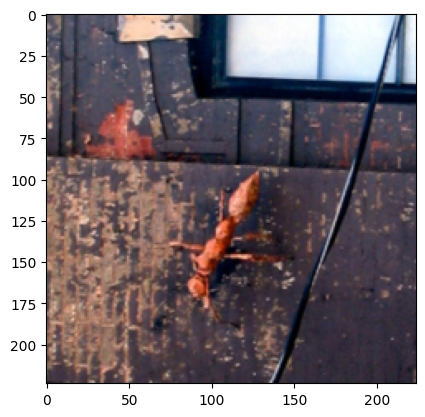

In [ ]:
# 전체 데이터 셋 로드
x, y = next(iter(train_dataset))

# 하나의 샘플 이미지를 시각화
dim = x.shape[1]
print("Dimension of image:", x.shape, "\n",
      "Dimension of labels", y.shape)

plt.imshow(x[160].reshape(1, 3, 224, 224).squeeze().T.numpy())

In [ ]:
x, y = next(iter(train_dataset))
print(x.shape)
print(len(y[y == 0]))

torch.Size([244, 150528])
123


In [ ]:
# Logistic Regression 구현
class LR(nn.Module):
  def __init__(self, dim, lr=torch.scalar_tensor(0.01)):
    super(LR, self).__init__()
    # 파라미터 초기화
    self.w = torch.zeros(dim, 1, dtype=torch.float).to(device)
    self.b = torch.scalar_tensor(0).to(device)
    self.grads = {"dw": torch.zeros(dim, 1, dtype=torch.float).to(device),
                  "db": torch.scalar_tensor(0).to(device)}
    self.lr = lr.to(device)

  def forward(self, x):
    # forward 연산 정의
    z = torch.mm(self.w.T, x) + self.b
    a = self.sigmoid(z)
    return a

  def sigmoid(self, z):
    return 1/(1 + torch.exp(-z))

  def backward(self, x, yhat, y):
    # 미분값 계산하는 과정을 정의. PyTorch nn.Module은 backward를 재정의할 수 있습니다.
    self.grads["dw"] = (1/x.shape[1]) * torch.mm(x, (yhat - y).T)
    self.grads["db"] = (1/x.shape[1]) * torch.sum(yhat - y)

  def optimize(self):
    # 최적화 방법 정의
    self.w = self.w - self.lr * self.grads["dw"]
    self.b = self.b - self.lr * self.grads["db"]

# loss function 정의
def loss(yhat, y):
  m = y.size()[1]
  return -(1/m)* torch.sum(y*torch.log(yhat) + (1 - y)* torch.log(1-yhat))

# 예측한 결과인 확률 값을 0과 1로 변환 후, accuracy를 반환하는 함수 정의
def predict(yhat, y):
  y_prediction = torch.zeros(1, y.size()[1])
  for i in range(yhat.size()[1]):
    if yhat[0, i] <= 0.5:
      y_prediction[0, i] = 0
    else:
      y_prediction[0, i] = 1
  return 100 - torch.mean(torch.abs(y_prediction - y)) * 100

In [ ]:
# 데이터 로드
x, y = next(iter(train_dataset))

## flatten/transform the data
x_flatten = x.T
y = y.unsqueeze(0)

# flatten된 이미지의 dimension 계산
dim = x_flatten.shape[0]

# model 객체 생성
model = LR(dim)
model.to(device)
yhat = model.forward(x_flatten.to(device))
yhat = yhat.data.cpu()

# loss 계산
cost = loss(yhat, y)
prediction = predict(yhat, y)
print("Cost: ", cost)
print("Accuracy: ", prediction)

# gradient 계산과 함께 optimize
model.backward(x_flatten.to(device), yhat.to(device), y.to(device))
model.optimize()

Cost:  tensor(0.6931)
Accuracy:  tensor(50.4098)


In [ ]:
costs = []
dim = x_flatten.shape[0]
# 하이퍼 파라미터 정의
learning_rate = torch.scalar_tensor(0.0001).to(device)
num_iterations = 100

# model 객체 생성
lrmodel = LR(dim, learning_rate)
lrmodel.to(device)

# test 데이터 변환을 위해 정의한 flatten 함수
def transform_data(x, y):
  x_flatten = x.T
  y = y.unsqueeze(0)
  return x_flatten, y

# 학습 코드
for i in range(num_iterations):
  x, y = next(iter(train_dataset))
  test_x, test_y = next(iter(test_dataset))
  x, y = transform_data(x, y)
  test_x, test_y = transform_data(test_x, test_y)

  # 전체 데이터 셋을 모두 연산하고 loss를 계산
  yhat = lrmodel.forward(x.to(device))
  cost = loss(yhat.data.cpu(), y)
  train_pred = predict(yhat, y)

  # gradient 계산
  lrmodel.backward(x.to(device),
                  yhat.to(device),
                  y.to(device))
  # 최적화
  lrmodel.optimize()
  # test set에 대한 예측 수행
  yhat_test = lrmodel.forward(test_x.to(device))
  test_pred = predict(yhat_test, test_y)

  if i % 10 == 0:
    costs.append(cost)

  if i % 10 == 0:
    print("Cost after iteration {}: {} | Train Acc: {} | Test Acc: {}".format(i,
                                                                              cost,
                                                                              train_pred,
                                                                              test_pred))


Cost after iteration 0: 0.6931472420692444 | Train Acc: 50.40983581542969 | Test Acc: 45.75163269042969
Cost after iteration 10: 0.6691464781761169 | Train Acc: 64.3442611694336 | Test Acc: 54.24836730957031


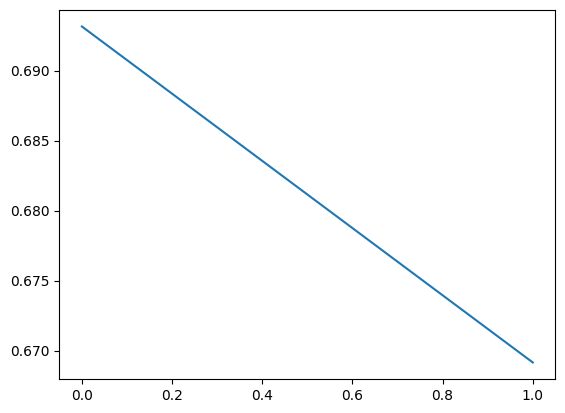

In [ ]:
# loss 그래프 시각화
plt.plot(costs)
plt.show()

## References

<hr style="height:5px;border:none;color:#5F71F7;background-color:#5F71F7">

- [Ants and bees image](https://www.oneindia.com/international/honeybees-ants-may-provide-clues-to-suicide-in-humans-1995974.html)

## 콘텐츠 라이선스

<hr style="height:5px;border:none;color:#5F71F7;background-color:#5F71F7">

<font color='red'><b>WARNING</font> : 본 교육 콘텐츠의 지식재산권은 재단법인 네이버커넥트에 귀속됩니다. 본 콘텐츠를 어떠한 경로로든 외부로 유출 및 수정하는 행위를 엄격히 금합니다. 다만, 비영리적 교육 및 연구활동에 한정되어 사용할 수 있으나 재단의 허락을 받아야 합니다. 이를 위반하는 경우, 관련 법률에 따라 책임을 질 수 있습니다. </b>